In [18]:
#Homework
#Python - Tarea de partidos de futbol masculino
#Name: Johanna Vinueza

#Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
partidosfut=pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt',sep="\t")
partidosfut.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0


In [25]:
#Elegimos 2 paises en donde filtraremos su data creándola como un dataframe
argentina_vs_francia = partidosfut[((partidosfut['equipo_1'] == 'Argentina') & (partidosfut['equipo_2'] == 'Francia')) | ((partidosfut['equipo_1'] == 'Francia') & (partidosfut['equipo_2'] == 'Argentina'))]
argentina_vs_francia

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0
278,1978,Argentina,Estadio Monumental,Buenos Aires,(9),1978-06-06,Argentina,Francia,2,1
885,2018,Rusia,Kazan Arena,Kazan (UTC+3),(50),2018-06-30,Francia,Argentina,4,3


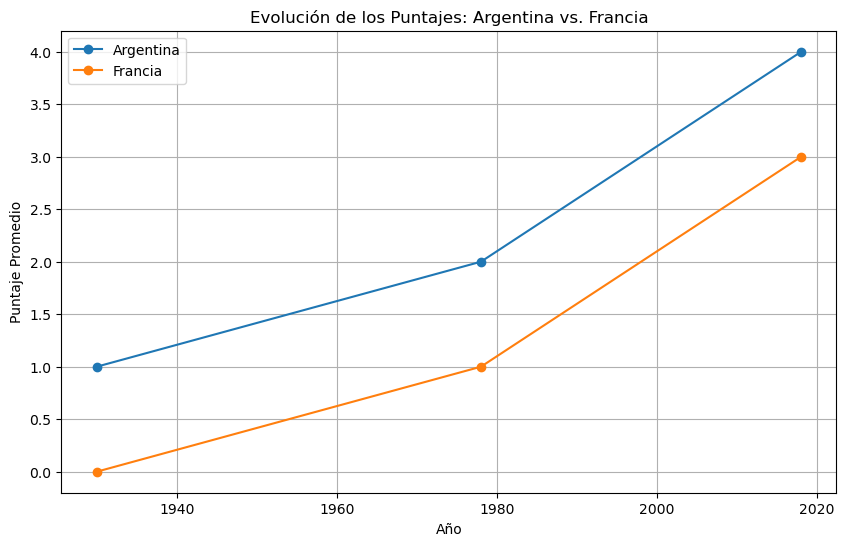

<Figure size 640x480 with 0 Axes>

In [37]:
#Grafica 1
# Agrupamos los datos por año y calculamos el puntajes promedio de Argentina y Francia
grouped_data = argentina_vs_francia.groupby('anio')[['equipo_1_final', 'equipo_2_final']].mean().reset_index()

# Crea un gráfico de líneas que muestra la evolución de los puntajes a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['anio'], grouped_data['equipo_1_final'], label='Argentina', marker='o')
plt.plot(grouped_data['anio'], grouped_data['equipo_2_final'], label='Francia', marker='o')
plt.xlabel('Año')
plt.ylabel('Puntaje Promedio')
plt.title('Evolución de los Puntajes: Argentina vs. Francia')
plt.legend()
plt.grid(True)
plt.show()

#Guardar grafico PNG 
plt.savefig('grafico_comparacion.png')  


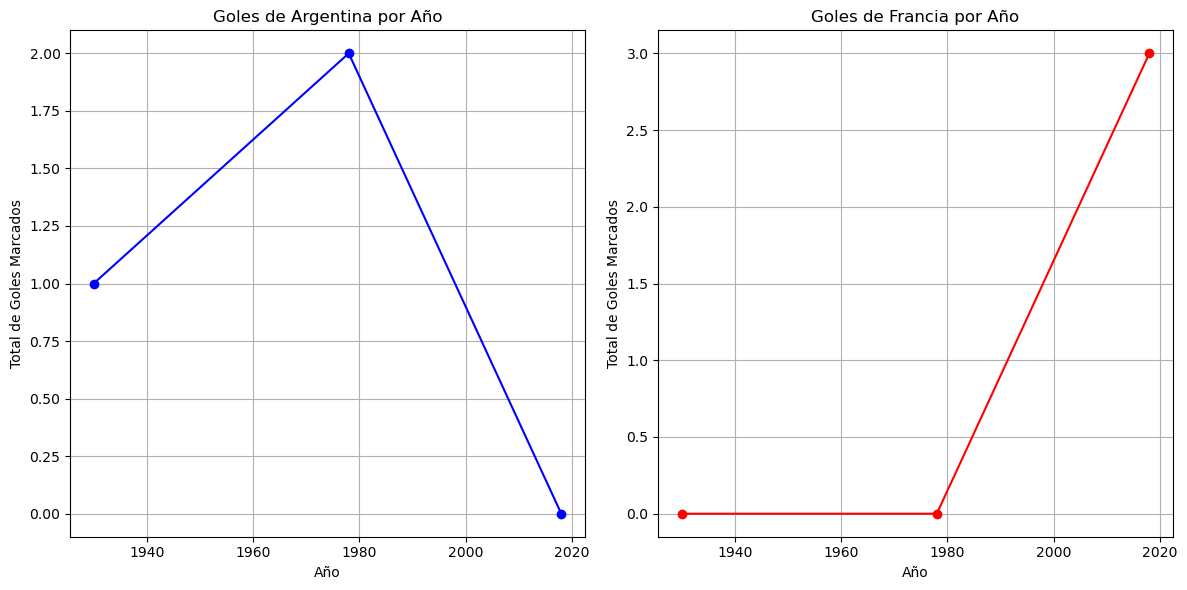

<Figure size 640x480 with 0 Axes>

In [40]:
#Grafica 2

# Calcularemos la cantidad total de goles marcados por Argentina y Francia de cada año
goles_argentina = argentina_vs_francia.groupby(['anio', 'equipo_1'])['equipo_1_final'].sum().unstack(fill_value=0)
goles_francia = argentina_vs_francia.groupby(['anio', 'equipo_1'])['equipo_2_final'].sum().unstack(fill_value=0)

ano_mas_goles_argentina = goles_argentina.sum(axis=1).idxmax()
ano_mas_goles_francia = goles_francia.sum(axis=1).idxmax()

#Subgráfico de líneas para Argentina
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(goles_argentina.index, goles_argentina['Argentina'], label='Argentina', marker='o', color='blue')
plt.xlabel('Año')
plt.ylabel('Total de Goles Marcados')
plt.title('Goles de Argentina por Año')
plt.grid(True)

#Subgráfico de líneas para Francia
plt.subplot(122)
plt.plot(goles_francia.index, goles_francia['Francia'], label='Francia', marker='o', color='red')
plt.xlabel('Año')
plt.ylabel('Total de Goles Marcados')
plt.title('Goles de Francia por Año')
plt.grid(True)

plt.tight_layout()
plt.show()


#Guardar grafico PNG 
plt.savefig('grafico_subgrafico.png')  
